IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.metrics import silhouette_score

COMPANY X DATABASE CONNECTION

In [2]:
DRIVER_NAME = 'SQL Server'
SERVER_NAME = 'LAPTOP-3R59J9VQ'  # Replace with your server name
DATABASE_NAME = 'CompanyX'       # Replace with your database name

# Connection string for SQLAlchemy
conn_str = f"mssql+pyodbc://{SERVER_NAME}/{DATABASE_NAME}?driver=SQL+Server+Native+Client+11.0"

# Create SQLAlchemy engine
engine = create_engine(conn_str)


In [3]:
print(conn_str)

mssql+pyodbc://LAPTOP-3R59J9VQ/CompanyX?driver=SQL+Server+Native+Client+11.0


In [4]:
query = """
SELECT 
    p.Productname,
    p.ProductID,
    p.Category,
    f.Revenue,
    f.ROI,
    f.NetProfitMargin
FROM 
    Fact f
JOIN 
    DimProduct p ON f.ProductID = p.ProductID
"""

# Load data into a pandas DataFrame
data = pd.read_sql(query, engine)
print("Data loaded successfully.")

# Preview the data
print("Data Sample:")
print(data.head())

Data loaded successfully.
Data Sample:
               Productname  ProductID     Category  Revenue       ROI  \
0      Patch Kit/8 Patches        873  Accessories    1.374  0.335668   
1    Touring-3000 Blue, 58        959        Bikes  445.410 -0.041866   
2    Touring-3000 Blue, 58        959        Bikes  445.410 -0.028718   
3  Touring-3000 Yellow, 44        961        Bikes  445.410 -0.039488   
4  Touring-3000 Yellow, 44        961        Bikes  445.410 -0.043436   

   NetProfitMargin  
0        37.663755  
1        -3.600009  
2        -3.600009  
3        -3.600009  
4        -3.600009  


In [5]:
data = data.dropna()

In [6]:
# Check for NaN values in the dataset
print(data.isnull().sum())


Productname        0
ProductID          0
Category           0
Revenue            0
ROI                0
NetProfitMargin    0
dtype: int64


In [7]:
# Define function to preprocess data for each category
def preprocess_category(data, category_name):
    # Filter data for the given category
    category_data = data[data['Category'] == category_name]
    
    # Select relevant features for clustering
    features = category_data[['Revenue', 'ROI', 'NetProfitMargin']]
    
    # Standardize the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    return category_data, features_scaled

# Example: Preprocess the 'Bike' category
bikes_data, bikes_features = preprocess_category(data, 'Bikes')
clothing_data, clothing_features = preprocess_category(data, 'Clothing')
components_data, components_features = preprocess_category(data, 'Components')
accessories_data, accessories_features = preprocess_category(data, 'Accessories')
print("Bike data: ")
print(bikes_data.describe())
print("Clothings data: ")
print(clothing_data.describe())
print("Components data: ")
print(components_data.describe())
print("Accessories data: ")
print(accessories_data.describe())

Bike data: 
         ProductID       Revenue          ROI  NetProfitMargin
count  1892.000000   1892.000000  1892.000000      1892.000000
mean    861.419662   2614.546917    -0.064909        -4.844985
std      97.957439   2693.477702     0.495972        19.959925
min     749.000000    112.998000    -4.222552      -172.764031
25%     778.000000    874.794000    -0.203398        -6.066661
50%     795.500000   1466.010000    -0.070200        -3.599999
75%     969.000000   3361.470000     0.149032         6.266665
max     999.000000  20195.912000     2.587926         9.078667
Clothings data: 
        ProductID      Revenue         ROI  NetProfitMargin
count  390.000000   390.000000  390.000000       390.000000
mean   815.179487   167.953105    0.725558         8.308762
std     71.463285   168.019198    2.047930        32.538025
min    709.000000     5.186500   -9.595960       -45.600825
25%    715.000000    56.515600   -0.383297       -28.333333
50%    858.500000   115.361600    0.479584  

In [8]:
# Function to determine the optimal number of clusters using Elbow Method
def find_optimal_clusters(features, max_clusters=30):
    inertia = []  # List to store inertia for each K
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features)
        inertia.append(kmeans.inertia_)
    
    # Plot the Elbow Curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters+1), inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Clusters')
    plt.show()

# Find optimal clusters for Bike category
# find_optimal_clusters(bike_features)
# find_optimal_clusters(clothing_features)
# find_optimal_clusters(component_features)
# find_optimal_clusters(accessories_features)


In [9]:
# # Perform K-Means clustering
# kmeans = KMeans(n_clusters=4, random_state=42)  # Replace 3 with optimal K
# bikes_data['Cluster'] = kmeans.fit_predict(bikes_features)

# # Visualize clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=bikes_data, x='Revenue', y='ROI', 
#                 hue='Cluster', palette='viridis', s=100)
# plt.title('Clustering Results for Bike Category')
# plt.xlabel('Total Revenue')
# plt.ylabel('Return on Investment')
# plt.legend(title='Cluster')
# plt.show()

# # Analyze cluster statistics
# cluster_summary = bike_data.groupby('Cluster')[['Revenue', 
#                                                 'ROI', 
#                                                 'NetProfitMargin']].mean()
# print("Cluster Summary for Bike Category:")
# print(cluster_summary)


In [10]:
# # Categories to analyze
# categories = ['Bikes', 'Clothing', 'Components', 'Accessories']

# # Loop through each category
# for category in categories:
#     print(f"\n--- Clustering for {category} Category ---")
    
#     # Preprocess data
#     category_data, features_scaled = preprocess_category(data, category)
    
#     # Find optimal clusters
#     find_optimal_clusters(features_scaled)
    
#     # Apply K-Means with determined K (example uses 3)
#     kmeans = KMeans(n_clusters=3, random_state=42)
#     category_data['Cluster'] = kmeans.fit_predict(features_scaled)
    
#     # Plot clustering results
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(data=category_data, x='Revenue', y='ROI', 
#                     hue='Cluster', palette='viridis', s=100)
#     plt.title(f'Clustering Results for {category} Category')
#     plt.xlabel('Total Revenue')
#     plt.ylabel('Return on Investment')
#     plt.legend(title='Cluster')
#     plt.show()


In [11]:


# Function to perform clustering and visualize results
def perform_clustering(data, category_name, n_clusters):
    # Preprocess the data
    category_data, features_scaled = preprocess_category(data, category_name)
    
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    category_data['Cluster'] = kmeans.fit_predict(features_scaled)
    
    # Get centroids and inverse-transform to original scale
    scaler = StandardScaler().fit(category_data[['Revenue', 'ROI', 'NetProfitMargin']])
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    
    # Visualize clustering results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=category_data, x='Revenue', y='ROI', 
                    hue='Cluster', palette='viridis', s=100)
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                c='red', s=300, marker='X', label='Centroids')
    
    plt.title(f'Clustering Results for {category_name} Category')
    plt.xlabel('Total Revenue')
    plt.ylabel('Return on Investment')
    plt.legend(title='Cluster')
    plt.show()
    
    # Analyze cluster statistics
    cluster_summary = category_data.groupby('Cluster')[['Revenue', 'ROI', 'NetProfitMargin']].mean()
    print(f"Cluster Summary for {category_name} Category:")
    print(cluster_summary)
    
    return category_data

# # Categories to analyze
# categories = ['Bikes', 'Clothing', 'Components', 'Accessories']

# # Loop through each category
# for category in categories:
#     print(f"\n--- Clustering for {category} Category ---")
    
#     # Preprocess data
#     category_data, features_scaled = preprocess_category(data, category)
    
#     # Find optimal clusters
#     find_optimal_clusters(features_scaled)
    
#     # Apply clustering with a predefined number of clusters (example uses 3)
#     clustered_data = perform_clustering(data, category, n_clusters=4)





--- Clustering for Bikes Category ---


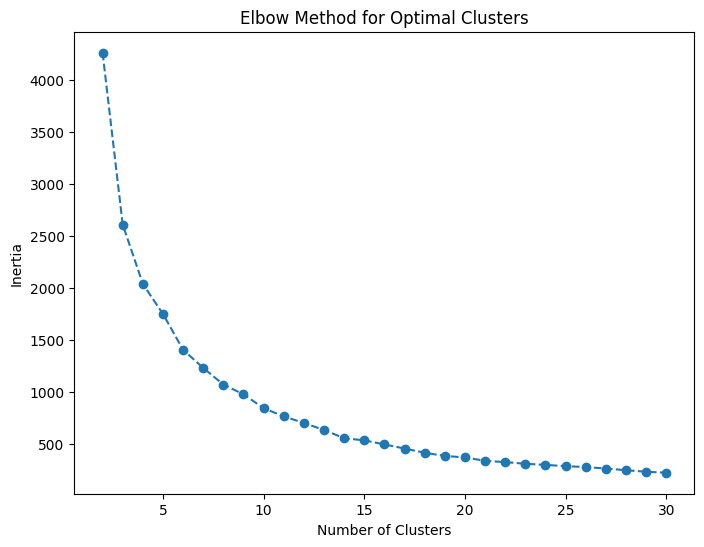

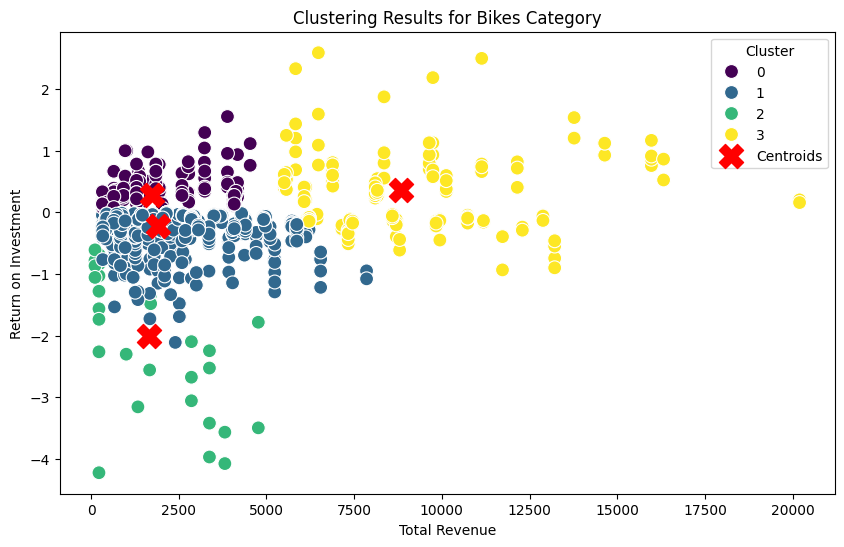

Cluster Summary for Bikes Category:
             Revenue       ROI  NetProfitMargin
Cluster                                        
0        1740.247823  0.280008         8.386745
1        1918.341954 -0.218990        -8.270298
2        1638.134829 -2.008896      -116.993384
3        8837.183414  0.357687         3.448138


In [12]:
print(f"\n--- Clustering for Bikes Category ---")
# Find optimal clusters
find_optimal_clusters(bikes_features)
# Apply clustering with a predefined number of clusters (example uses 3)
bikes_clustered_data = perform_clustering(bikes_data,'Bikes', n_clusters=4)


--- Clustering for Components Category ---


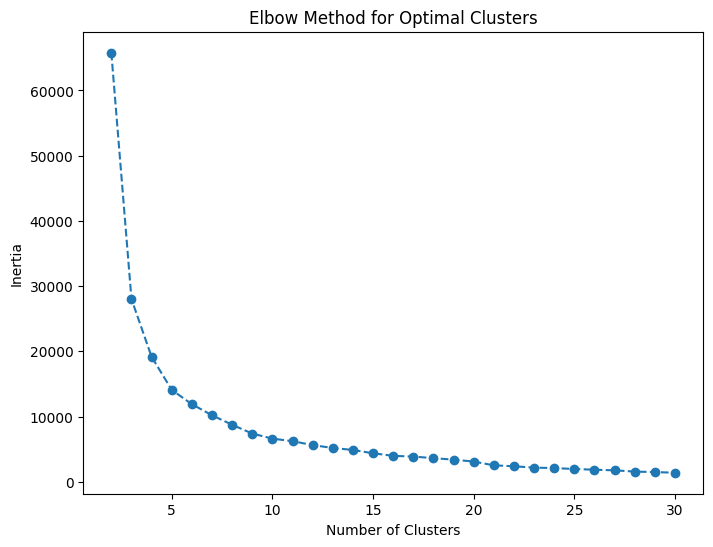

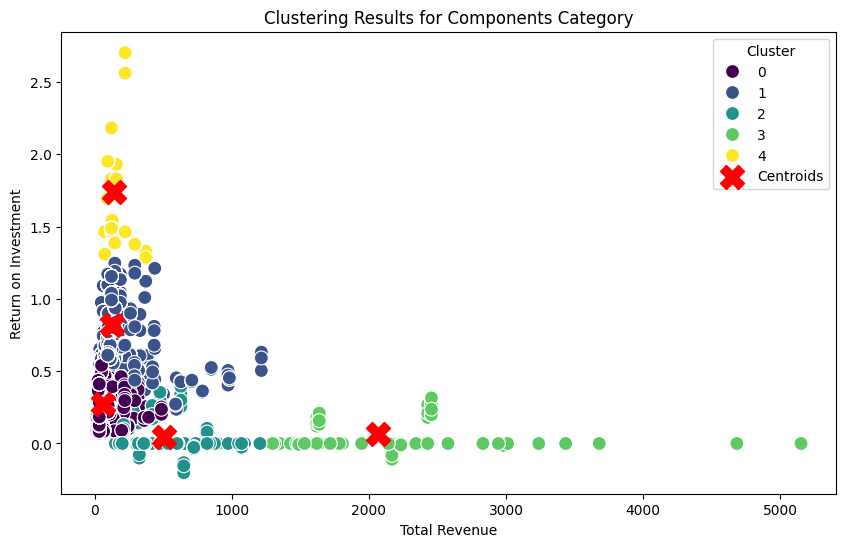

Cluster Summary for Components Category:
             Revenue       ROI  NetProfitMargin
Cluster                                        
0          61.265443  0.270280        25.967409
1         126.946302  0.817076        25.995893
2         505.419900  0.041475         4.748025
3        2067.029544  0.065349         3.053654
4         140.482578  1.739993        25.999825


In [13]:
print(f"\n--- Clustering for Components Category ---")
# Find optimal clusters
find_optimal_clusters(components_features)
# Apply clustering with a predefined number of clusters (example uses 3)
components_clustered_data = perform_clustering(components_data,'Components', n_clusters=5)


--- Clustering for Clothing Category ---


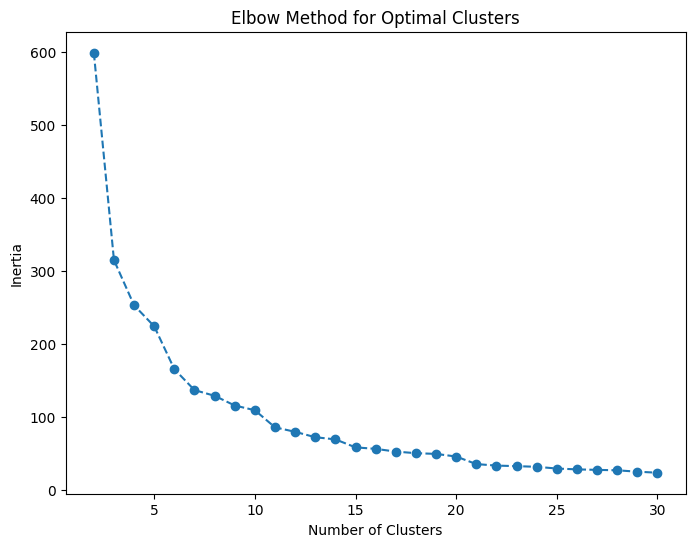

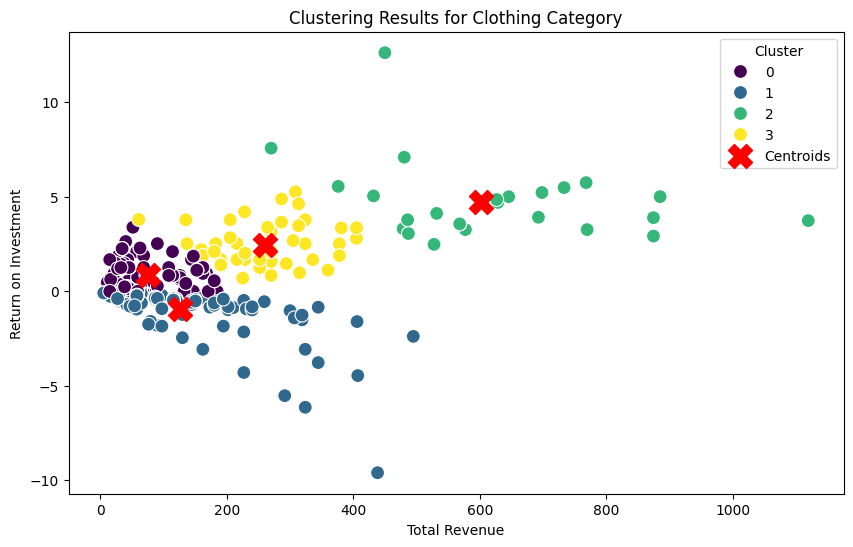

Cluster Summary for Clothing Category:
            Revenue       ROI  NetProfitMargin
Cluster                                       
0         75.029700  0.870152        35.717156
1        125.772365 -0.945617       -31.661231
2        602.545728  4.725136        30.033398
3        259.928189  2.439762        33.630211


In [14]:
print(f"\n--- Clustering for Clothing Category ---")
# Find optimal clusters
find_optimal_clusters(clothing_features)
# Apply clustering with a predefined number of clusters (example uses 3)
clothing_clustered_data = perform_clustering(clothing_data,'Clothing', n_clusters=4)


--- Clustering for Accessories Category ---


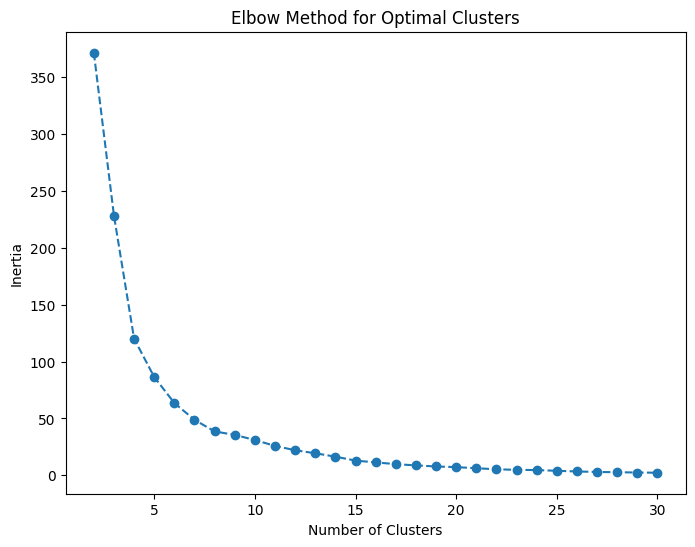

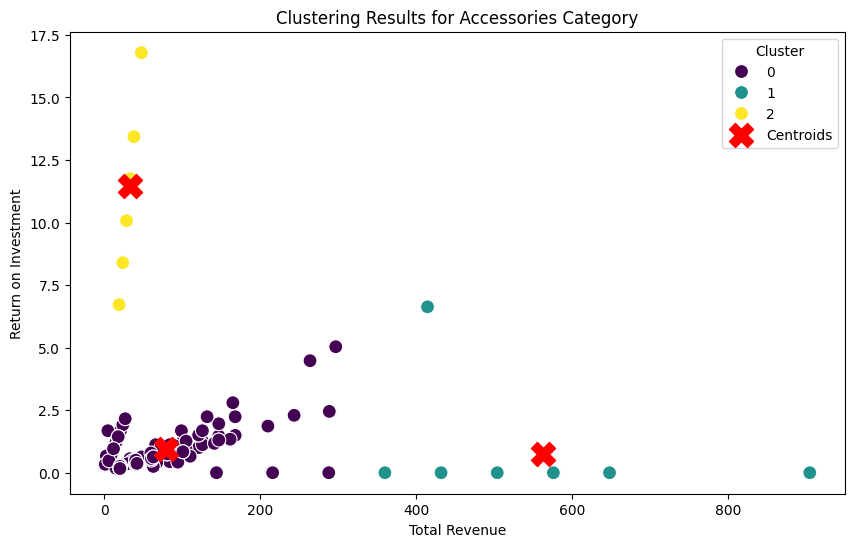

Cluster Summary for Accessories Category:
            Revenue        ROI  NetProfitMargin
Cluster                                        
0         78.928313   0.956929        35.102162
1        562.602733   0.736665        37.189003
2         32.522727  11.444660        37.666667


In [15]:
print(f"\n--- Clustering for Accessories Category ---")
# Find optimal clusters
find_optimal_clusters(accessories_features)
# Apply clustering with a predefined number of clusters (example uses 3)
accessories_clustered_data = perform_clustering(accessories_data,'Accessories', n_clusters=3)

In [16]:
# import os

# # Ensure the output directory exists
# output_dir = "clustering_results"
# os.makedirs(output_dir, exist_ok=True)

# # Function to save clustered data for each category
# def save_clustered_data(data, category_name):
#     file_path = os.path.join(output_dir, f"{category_name}_clusters.csv")
#     data.to_csv(file_path, index=False)
#     print(f"Clustered data for {category_name} saved to {file_path}.")

# # Save the clustered data for each category
# save_clustered_data(clustered_data, "Bikes")
# save_clustered_data(perform_clustering(components_data, 'Components', n_clusters=3), "Components")
# save_clustered_data(perform_clustering(clothing_data, 'Clothing', n_clusters=3), "Clothing")
# save_clustered_data(perform_clustering(accessories_data, 'Accessories', n_clusters=3), "Accessories")


In [17]:
from sqlalchemy import inspect

def save_to_sql_server(data, table_name, engine):
    """
    Save the given data to a SQL Server table.
    
    Args:
        data (pd.DataFrame): The DataFrame to save.
        table_name (str): The name of the target table.
        engine (sqlalchemy.engine.Engine): The SQLAlchemy engine for the database connection.
    """
    try:
        # Inspect the database schema
        inspector = inspect(engine)
        
        # Check if the table exists
        if not inspector.has_table(table_name):
            print(f"Table '{table_name}' does not exist. Creating the table...")
            # Create the table using the first row of data
            data.head(0).to_sql(table_name, con=engine, if_exists='replace', index=False)
        
        # Check for duplicates by primary key (assumes 'ProductID' as the key)
        existing_ids_query = f"SELECT ProductID FROM {table_name}"
        existing_ids = pd.read_sql(existing_ids_query, con=engine)
        
        # Filter new rows
        new_data = data[~data['ProductID'].isin(existing_ids['ProductID'])]
        
        if not new_data.empty:
            # Append new data
            new_data.to_sql(table_name, con=engine, if_exists='append', index=False)
            print(f"Data successfully saved to table '{table_name}'.")
        else:
            print("No new data to add. Skipping update.")
    except Exception as e:
        print(f"Error saving data to SQL Server: {e}")


In [26]:
save_to_sql_server(bikes_clustered_data, 'KMean_Bikes_Clusters', engine)

Table 'KMean_Bikes_Clusters' does not exist. Creating the table...
Data successfully saved to table 'KMean_Bikes_Clusters'.


In [27]:
save_to_sql_server(components_clustered_data, 'KMean_Components_Clusters', engine)

Table 'KMean_Components_Clusters' does not exist. Creating the table...
Data successfully saved to table 'KMean_Components_Clusters'.


In [28]:
save_to_sql_server(clothing_clustered_data, 'KMean_Clothing_Clusters', engine)

Table 'KMean_Clothing_Clusters' does not exist. Creating the table...
Data successfully saved to table 'KMean_Clothing_Clusters'.


In [29]:
save_to_sql_server(accessories_clustered_data, 'KMean_Accessories_Clusters', engine)

Table 'KMean_Accessories_Clusters' does not exist. Creating the table...
Data successfully saved to table 'KMean_Accessories_Clusters'.
